## Logistic Regression Project

***Задача***: Создать модель классификации для предсказания наличия признаков болезни сердца у пациента в зависимости от физических характеристик этого человека (возраст, пол, холестерин и т.д.)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

## About data

В базе данных содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. 

* ***age*** - возраст
* ***sex*** - пол
* ***cp - chest pain*** - тип боли в груди (4 значения)
* ***trestbps - resting blood pressure*** - давление в состоянии покоя
* ***chol*** - уровень холистерина в крови, в mg/dl
* ***fbs*** - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* ***restecg - resting electrocardiographic results*** - результаты электрокардиограммы (значнеия 0,1,2)
* ***thalach*** - максимальный пульс
* ***exang - exercise induced angina*** - возникновение ангины в результате упражнений
* ***oldpeak*** - пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ***slope*** - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ***ca*** - количество крупных сосудов (0-3), окрашенных флурозопией
* ***thal*** -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* ***target*** - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца

Источник: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Exploratory Data Analysis (EDA) 

In [2]:
df = pd.read_csv('D:/Machine Learning/Новая папка/_DATA/heart.csv')

Применение генерации признаков (Feature Engineering) не требуется.

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Целевая переменная.

In [4]:
df['target'].unique()

array([1, 0], dtype=int64)

Пропуски в данных отсутствуют.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum().any()

False

Статистика по числовым колонкам.

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Соотношение классов примерно 1.2:1 (165/138 ≈ 1.2), что является небольшим дисбалансом.

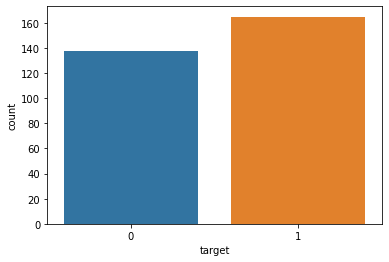

In [8]:
sns.countplot(data =df, x ='target');

Исследование признаков 'age', 'trestbps', 'chol', 'thalach', 'target'.  

Присутствует пересечение классов друг с другом, производительность логистической регрессии может быть неоптимальной.

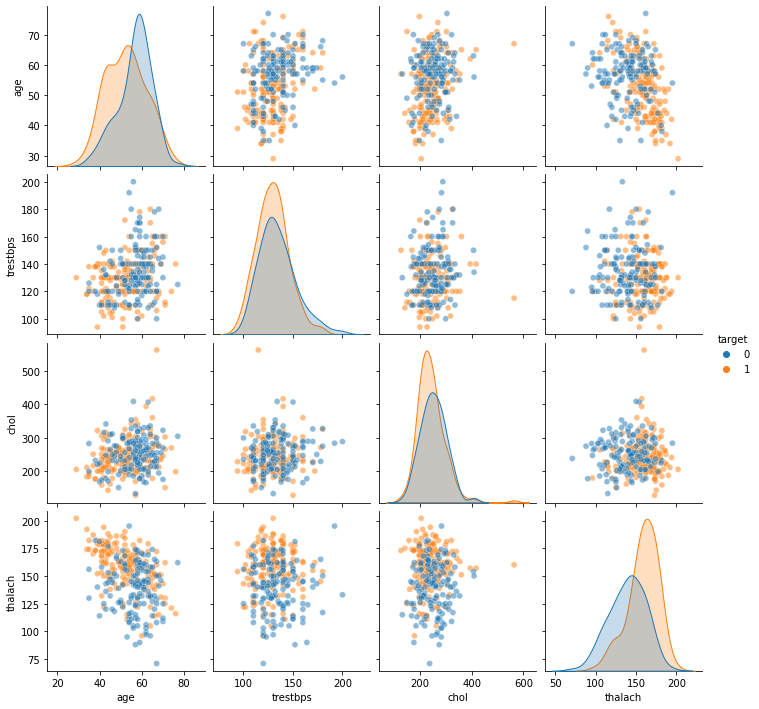

In [9]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],
             hue='target',
             plot_kws={'alpha': 0.5})

Для многих признаков наблюдается средний уровень корреляции (как положительной, так и отрицательной) с целевой переменной.

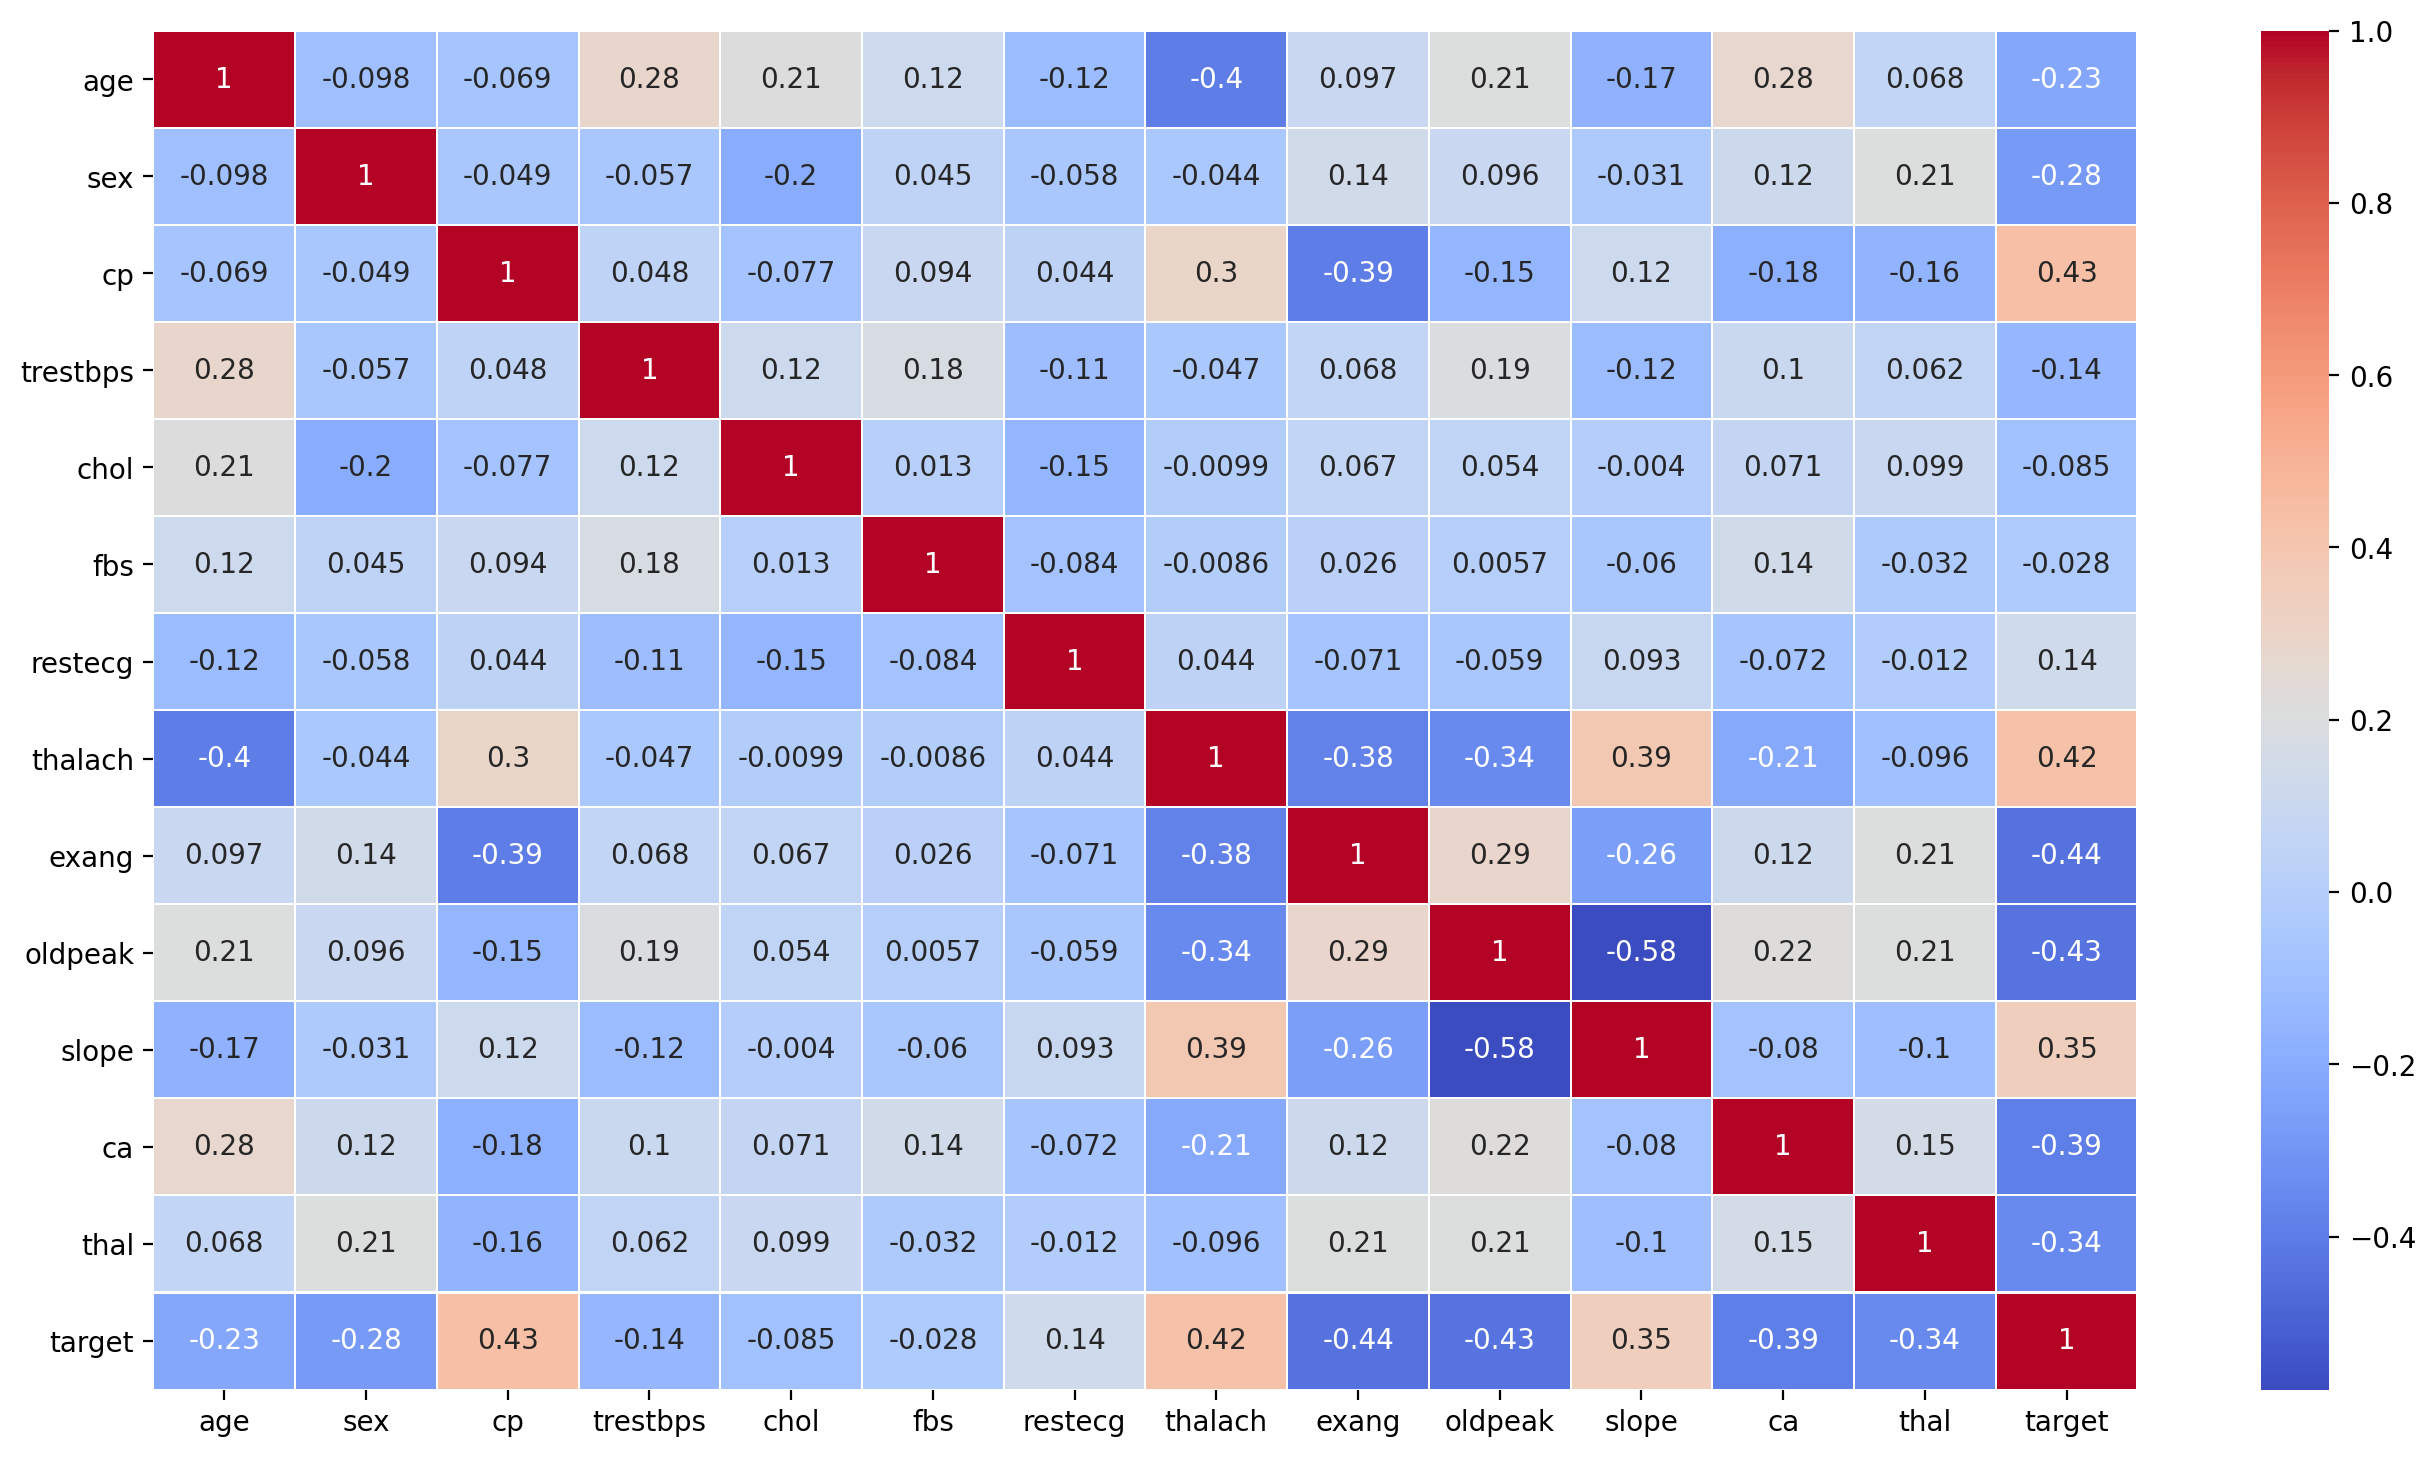

In [10]:
plt.figure(figsize=(16, 9), dpi=200)
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm', linewidths = .4);

## Model Initialization and Training

### Data Splitting

Разделяем признаки и целевую переменную на 2 объекта, X и y.

In [11]:
X = df.drop('target',axis=1)
y = df['target']

Разобъем данные на обучающий и тестовый наборы. Для тестовых данных используем размер 10% и значение random_state=101.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

С помощью объекта StandardScaler масштабируем данные признаков в обучающем и тестовом наборах данных.

In [13]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Initialize Model

In [14]:
# Инициализация модели
log_model = LogisticRegression(solver='liblinear', max_iter=1000)

### Hyperparameter Tuning (GridSearch)

In [15]:
# Диапазон значений C
C = np.logspace(-4, 4, 20)  # Логарифмический диапазон от 1e-4 до 1e4, 20 точек

# Типы регуляризации
penalty = ['l1', 'l2']

# Создание словаря с параметрами
param_grid = {'C': C, 'penalty': penalty}


# GridSearchCV
grid_model = GridSearchCV(log_model, param_grid=param_grid, scoring='f1', n_jobs=-1)

### Fit the Model

In [16]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [17]:
grid_model.best_params_

{'C': 0.012742749857031334, 'penalty': 'l2'}

Визуализация коэффициентов по степени влияния признаков на целевую переменную. 

In [18]:
# Получаем лучшую модель, найденную GridSearchCV
best_model = grid_model.best_estimator_

# Получаем коэффициенты этой модели
coefficients = best_model.coef_.flatten()

# Если у вас есть названия признаков, их можно сопоставить с коэффициентами
# Например, если X_train - это pandas DataFrame:
feature_names = X_train.columns.tolist() #X_train.columns

# Выводим коэффициенты и их соответствующие признаки
for feature, coef in zip(feature_names, coefficients):
    print(f"Признак: {feature}, Коэффициент: {coef}")

Признак: age, Коэффициент: -0.08424869068946958
Признак: sex, Коэффициент: -0.21075499525390637
Признак: cp, Коэффициент: 0.3141858445827759
Признак: trestbps, Коэффициент: -0.07942131335145079
Признак: chol, Коэффициент: -0.047412488786772455
Признак: fbs, Коэффициент: 0.007149200170288576
Признак: restecg, Коэффициент: 0.054956247335399236
Признак: thalach, Коэффициент: 0.2075419849202769
Признак: exang, Коэффициент: -0.23535391616287518
Признак: oldpeak, Коэффициент: -0.23081329863987862
Признак: slope, Коэффициент: 0.17170144425053124
Признак: ca, Коэффициент: -0.28698909066878436
Признак: thal, Коэффициент: -0.22970104803008407


In [19]:
best_model.coef_

array([[-0.08424869, -0.210755  ,  0.31418584, -0.07942131, -0.04741249,
         0.0071492 ,  0.05495625,  0.20754198, -0.23535392, -0.2308133 ,
         0.17170144, -0.28698909, -0.22970105]])

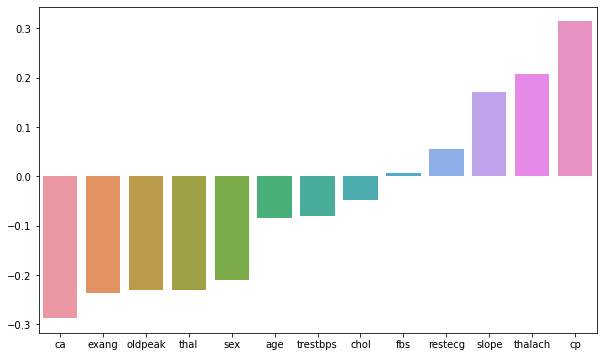

In [20]:
coefs = pd.Series(index=X.columns,data=best_model.coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);

## Prediction and Evaluation

* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report
* Precision-Recall Curve
* ROC curve

In [21]:
y_pred = grid_model.predict(scaled_X_test)

Наблюдается 5 случаев неправильной работы модели.

In [22]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

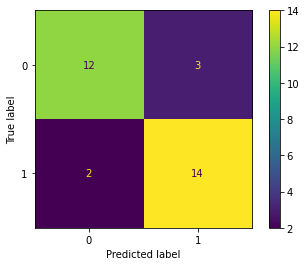

In [23]:
cm = confusion_matrix(y_test, y_pred, labels=grid_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_model.classes_)
disp.plot()
plt.show()

Более чем в 80% случаев модель получает правильный результат.

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



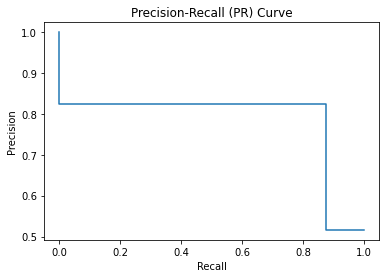

In [25]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall (PR) Curve')
plt.show()

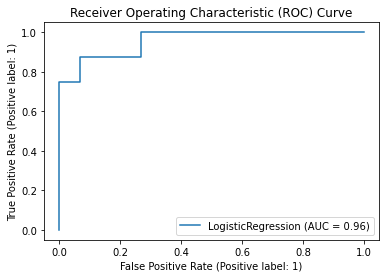

In [26]:
from sklearn.metrics import RocCurveDisplay

# Plot the ROC curve
RocCurveDisplay.from_estimator(grid_model.best_estimator_, 
                               scaled_X_test, 
                               y_test)

# Add a title and show the plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

**Проверка на новых данных:**   
В офис клиники пришёл пациент со следующими значениями признаков:

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0  
    
***Что предскажет модель для этого пациента? Есть ли здесь заболевание сердца? Насколько модель "уверена" в своём прогнозе?***

In [27]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

grid_model.predict(patient)

In [28]:
grid_model.predict_proba(patient)

array([[0.99661697, 0.00338303]])

Для класса 0 вероятность составляет 99%